Forecasting Sine Wave using Recurrent Neural network (RNN) and Long Short term memory (LSTM)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

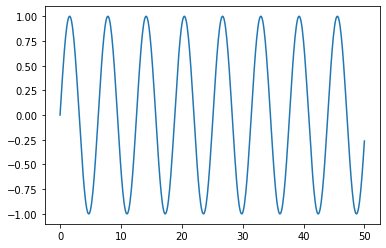

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data = y, index=x, columns=['Sin'])

In [7]:
df

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
test_percent = 0.1

In [9]:
len(df) * test_percent

50.1

In [10]:
test_point = np.round(len(df) * test_percent)

In [11]:
test_point

50.0

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

451

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaled_train = scaler.fit_transform(train)

In [19]:
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train, batch_size=batch_size, length=length)

In [22]:
len(scaled_train)

451

In [23]:
len(generator)

426

In [24]:
X, y = generator[0]

In [25]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [26]:
y

array([[0.79923759]])

In [27]:
#scaled_train

In [28]:
length = 25
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train, batch_size=batch_size, length=length)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

In [31]:
n_features = 1

In [32]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit_generator(generator,epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
426/426 [==============================] - 10s 16ms/step - loss: 0.0075
Epoch 2/5
426/426 [==============================] - 7s 16ms/step - loss: 1.1370e-04
Epoch 3/5
426/426 [==============================] - 7s 16ms/step - loss: 2.4670e-04
Epoch 4/5
426/426 [==============================] - 7s 16ms/step - loss: 5.8196e-05
Epoch 5/5
426/426 [==============================] - 7s 16ms/step - loss: 4.2153e-04


In [35]:
 losses = pd.DataFrame(model.history.history)
 

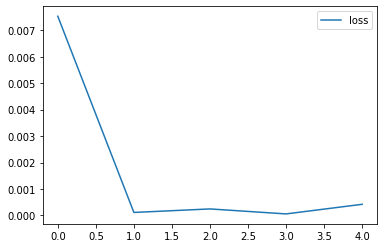

In [36]:
losses.plot()

In [37]:
first_eval_batch = scaled_train[-length:]

In [38]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [39]:
model.predict(first_eval_batch)[0]

array([0.9515682], dtype=float32)

In [40]:
scaled_test[0]

array([0.94955134])

In [41]:
model.predict(first_eval_batch)

array([[0.9515682]], dtype=float32)

In [42]:
test_prediction = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)



In [43]:
test_prediction

[array([0.9515682], dtype=float32),
 array([0.9704442], dtype=float32),
 array([0.9855439], dtype=float32),
 array([0.99471414], dtype=float32),
 array([0.9996312], dtype=float32),
 array([0.9988995], dtype=float32),
 array([0.9932681], dtype=float32),
 array([0.9827732], dtype=float32),
 array([0.9671492], dtype=float32),
 array([0.9473523], dtype=float32),
 array([0.9231328], dtype=float32),
 array([0.89548063], dtype=float32),
 array([0.8637572], dtype=float32),
 array([0.8289659], dtype=float32),
 array([0.7912095], dtype=float32),
 array([0.7507433], dtype=float32),
 array([0.7080559], dtype=float32),
 array([0.66334456], dtype=float32),
 array([0.61753136], dtype=float32),
 array([0.5699594], dtype=float32),
 array([0.52216214], dtype=float32),
 array([0.47363436], dtype=float32),
 array([0.42569283], dtype=float32),
 array([0.37799403], dtype=float32),
 array([0.3317965], dtype=float32),
 array([0.2868942], dtype=float32),
 array([0.24437417], dtype=float32),
 array([0.20440814]

In [44]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [45]:
true_prediction = scaler.inverse_transform(test_prediction)

In [46]:
true_prediction

array([[ 0.90313089],
       [ 0.94088262],
       [ 0.97108179],
       [ 0.98942211],
       [ 0.9992562 ],
       [ 0.9977928 ],
       [ 0.98653   ],
       [ 0.96554039],
       [ 0.93429267],
       [ 0.89469917],
       [ 0.84626053],
       [ 0.79095669],
       [ 0.72751032],
       [ 0.65792829],
       [ 0.58241613],
       [ 0.5014844 ],
       [ 0.41611026],
       [ 0.32668827],
       [ 0.2350626 ],
       [ 0.13991945],
       [ 0.04432569],
       [-0.05272908],
       [-0.14861139],
       [-0.24400821],
       [-0.33640254],
       [-0.42620641],
       [-0.51124579],
       [-0.59117721],
       [-0.66463303],
       [-0.7306543 ],
       [-0.78899132],
       [-0.8379726 ],
       [-0.87799344],
       [-0.9075919 ],
       [-0.92746311],
       [-0.93652375],
       [-0.93548115],
       [-0.92422123],
       [-0.90278405],
       [-0.87213668],
       [-0.83183872],
       [-0.78359804],
       [-0.72660139],
       [-0.66302529],
       [-0.59194247],
       [-0

In [47]:
test['prediction'] = true_prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
test

,Sin,prediction
45.1,0.899097,0.903131
45.2,0.938307,0.940883
45.3,0.968142,0.971082
45.4,0.988304,0.989422
45.5,0.998591,0.999256
45.6,0.998900,0.997793
45.7,0.989229,0.986530
45.8,0.969673,0.965540
45.9,0.940429,0.934293
46.0,0.901788,0.894699


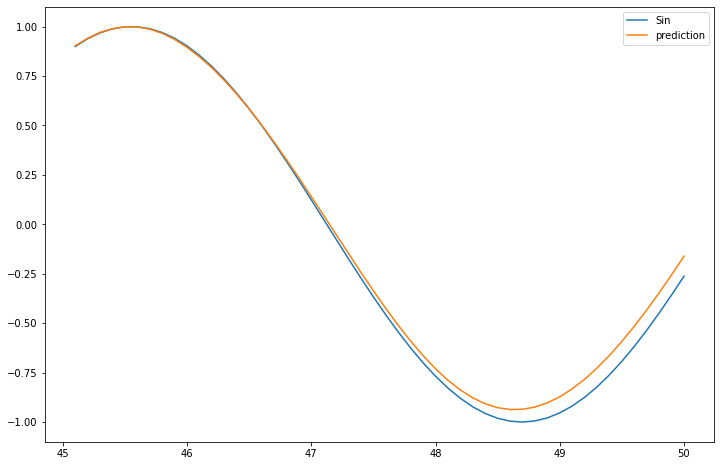

In [49]:
test.plot(figsize = (12,8))

In [50]:
 from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [53]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [54]:
model = Sequential()

model.add(LSTM(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam')

In [55]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
426/426 [==============================] - 6s 4ms/step - loss: 0.0113 - val_loss: 4.5246e-05
Epoch 2/20
426/426 [==============================] - 1s 3ms/step - loss: 1.2664e-04 - val_loss: 2.5186e-04
Epoch 3/20
426/426 [==============================] - 1s 3ms/step - loss: 4.9062e-04 - val_loss: 2.0775e-05
Epoch 4/20
426/426 [==============================] - 1s 3ms/step - loss: 4.2278e-05 - val_loss: 3.6173e-05
Epoch 5/20
426/426 [==============================] - 1s 3ms/step - loss: 4.2577e-05 - val_loss: 8.3350e-06
Epoch 6/20
426/426 [==============================] - 1s 3ms/step - loss: 7.9772e-05 - val_loss: 7.9869e-06
Epoch 7/20
426/426 [==============================] - 1s 3ms/step - loss: 1.6060e-04 - val_loss: 2.8187e-05
Epoch 8/20
426/426 [==============================] - 1s 3ms/step - loss: 2.4697e-04 - val_loss: 5.1197e-04


In [62]:
model.history.history

{'loss': [0.01128430012613535,
  0.000126635204651393,
  0.0004906243993900716,
  4.227824683766812e-05,
  4.257661566953175e-05,
  7.97719694674015e-05,
  0.00016059614426922053,
  0.0002469748433213681],
 'val_loss': [4.5246029912959784e-05,
  0.0002518561377655715,
  2.0774738004547544e-05,
  3.617319816839881e-05,
  8.334973244927824e-06,
  7.986946002347395e-06,
  2.8187452699057758e-05,
  0.0005119717097841203]}

In [63]:
test_prediction = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


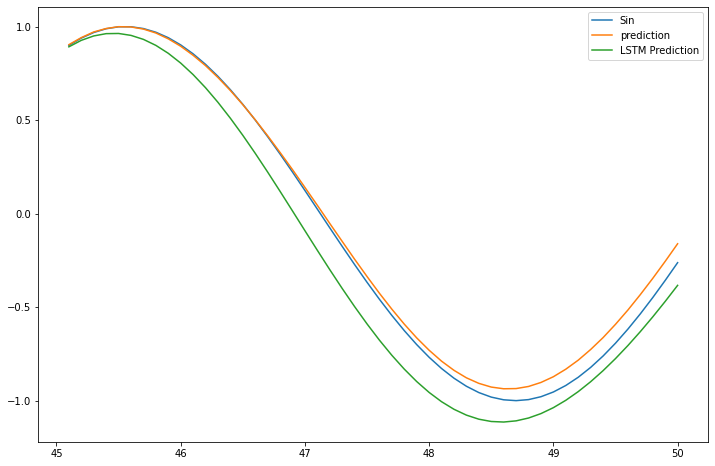

In [64]:
true_prediction = scaler.inverse_transform(test_prediction)
test['LSTM Prediction'] = true_prediction
test.plot(figsize = (12,8))

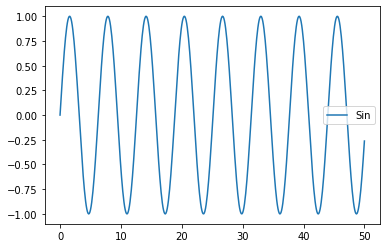

In [65]:
df.plot()

In [66]:
 full_scaler = MinMaxScaler()
 scaled_full_data = full_scaler.fit_transform(df)

In [67]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [68]:
model = Sequential()

model.add(LSTM(50,input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

In [69]:
model.fit(generator, epochs=8)

Epoch 1/8
476/476 [==============================] - 3s 3ms/step - loss: 0.0094
Epoch 2/8
476/476 [==============================] - 2s 3ms/step - loss: 1.0588e-04
Epoch 3/8
476/476 [==============================] - 2s 3ms/step - loss: 1.5185e-04
Epoch 4/8
476/476 [==============================] - 2s 3ms/step - loss: 2.7346e-04
Epoch 5/8
476/476 [==============================] - 2s 3ms/step - loss: 2.3777e-04
Epoch 6/8
476/476 [==============================] - 2s 3ms/step - loss: 6.0351e-05
Epoch 7/8
476/476 [==============================] - 2s 3ms/step - loss: 3.7733e-04
Epoch 8/8
476/476 [==============================] - 2s 3ms/step - loss: 1.0451e-04


In [70]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(25):

  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)



In [71]:
df

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [72]:
forecast = scaler.inverse_transform(forecast)

In [73]:
forecast

array([[ 0.89071964],
       [ 0.92622977],
       [ 0.95162401],
       [ 0.96679351],
       [ 0.97173207],
       [ 0.96653542],
       [ 0.95139441],
       [ 0.92658632],
       [ 0.89246365],
       [ 0.84944423],
       [ 0.79800381],
       [ 0.73866977],
       [ 0.67201705],
       [ 0.59866697],
       [ 0.51928674],
       [ 0.43459112],
       [ 0.34534223],
       [ 0.25235317],
       [ 0.15648583],
       [ 0.0586512 ],
       [-0.04019552],
       [-0.13906083],
       [-0.23692271],
       [-0.33274326],
       [-0.42548561]])

In [75]:
forecast_index = np.arange(50.1,52.6, step = 0.1)

In [76]:
len(forecast_index)

25

In [77]:
len(forecast)

25

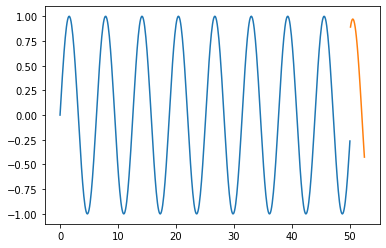

In [79]:
plt.plot(df.index,df['Sin'])
plt.plot(forecast_index,forecast)